# **Importing Library**




In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
sns.set_style(style = 'whitegrid')

# **Importing Data**

In [110]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df.head()

Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0           FDA15         9.30  ...  Supermarket Type1          3735.1380
1           DRC01         5.92  ...  Supermarket Type2           443.4228
2           FDN15        17.50  ...  Supermarket Type1          2097.2700
3           FDX07        19.20  ...      Grocery Store           732.3800
4           NCD19         8.93  ...  Supermarket Type1           994.7052

[5 rows x 12 columns]

In [111]:
test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test.head()

Item_Identifier  Item_Weight  ... Outlet_Location_Type        Outlet_Type
0           FDW58       20.750  ...               Tier 1  Supermarket Type1
1           FDW14        8.300  ...               Tier 2  Supermarket Type1
2           NCN55       14.600  ...               Tier 3      Grocery Store
3           FDQ58        7.315  ...               Tier 2  Supermarket Type1
4           FDY38          NaN  ...               Tier 3  Supermarket Type3

[5 rows x 11 columns]

# ***EDA***

In [112]:
df.shape

(8523, 12)

In [ ]:
df.describe()

Item_Weight  ...  Item_Outlet_Sales
count  7060.000000  ...        8523.000000
mean     12.857645  ...        2181.288914
std       4.643456  ...        1706.499616
min       4.555000  ...          33.290000
25%       8.773750  ...         834.247400
50%      12.600000  ...        1794.331000
75%      16.850000  ...        3101.296400
max      21.350000  ...       13086.964800

[8 rows x 5 columns]

In [ ]:
df.describe(include=['O'])

Item_Identifier Item_Fat_Content  ... Outlet_Location_Type        Outlet_Type
count             8523             8523  ...                 8523               8523
unique            1559                5  ...                    3                  4
top              FDW13          Low Fat  ...               Tier 3  Supermarket Type1
freq                10             5089  ...                 3350               5577

[4 rows x 7 columns]

## **checking null value**

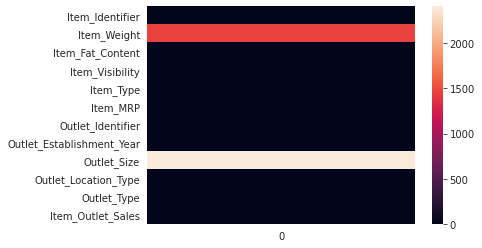

In [ ]:
sns.heatmap(df.isnull().sum().to_frame())

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


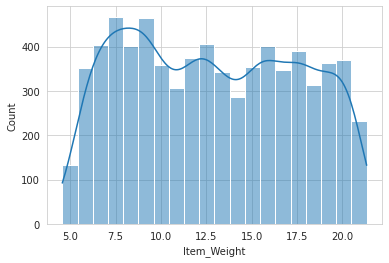

In [ ]:
sns.histplot(x='Item_Weight',data=df,kde=True)

Almost uniform distribution

**Selecting random value from Age to replace null value**

In [113]:
def rand_emputer(df,feature):
  ind=df.loc[df[feature].isnull()==True].index
  feat=df[feature].loc[df[feature].isnull()==False]
  val=feat.sample(len(ind))
  val.index=ind
  df[feature].loc[df[feature].isnull()]=val

In [114]:
rand_emputer(df,'Item_Weight')
rand_emputer(test,'Item_Weight')

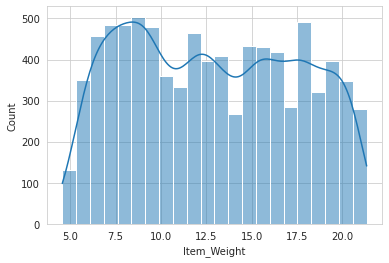

In [115]:
sns.histplot(x='Item_Weight',data=df,kde=True)

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [116]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Miss')
test['Outlet_Size']=df['Outlet_Size'].fillna('Miss')

## **Data Formatting**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Visualization**

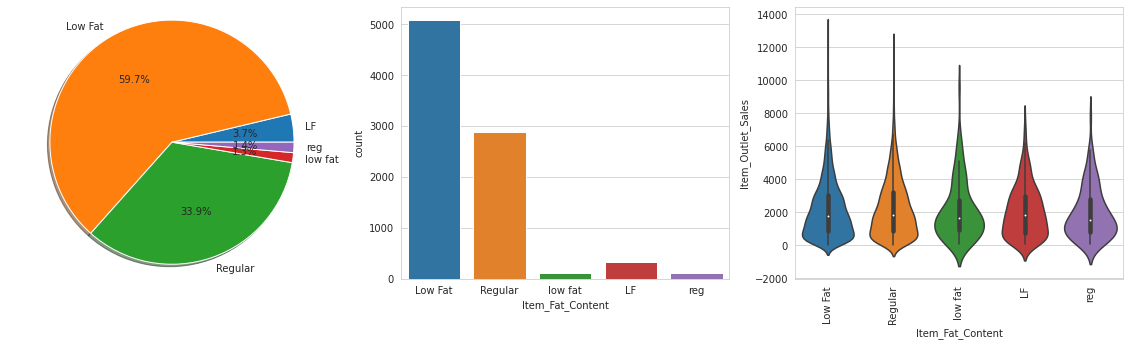

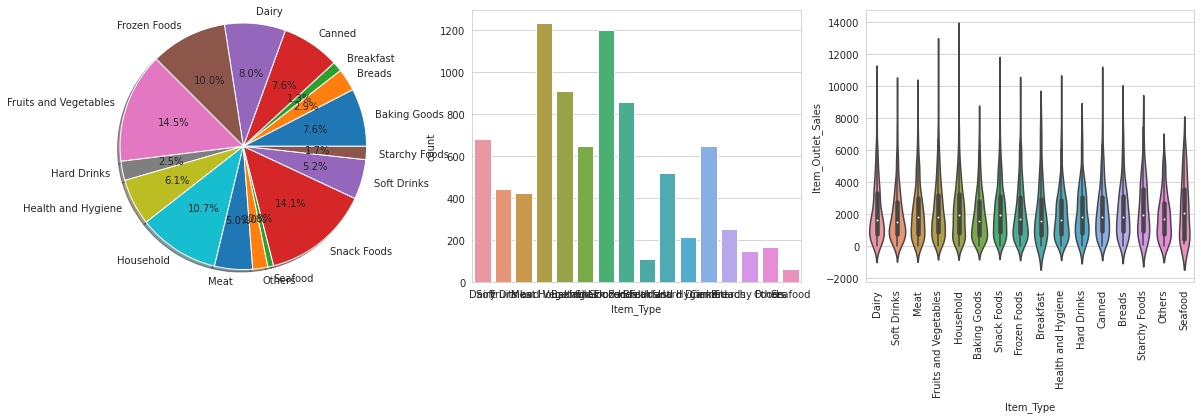

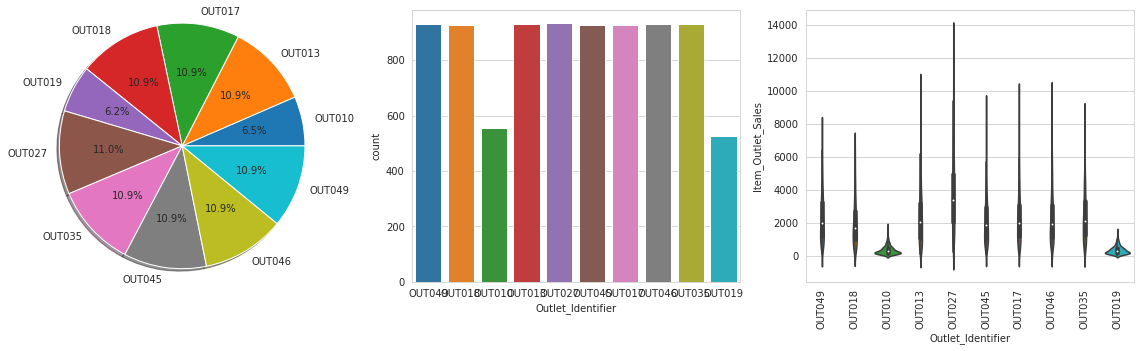

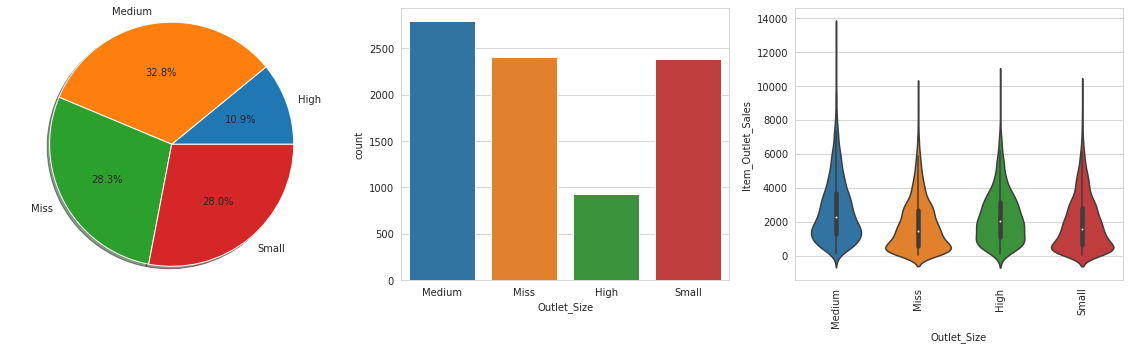

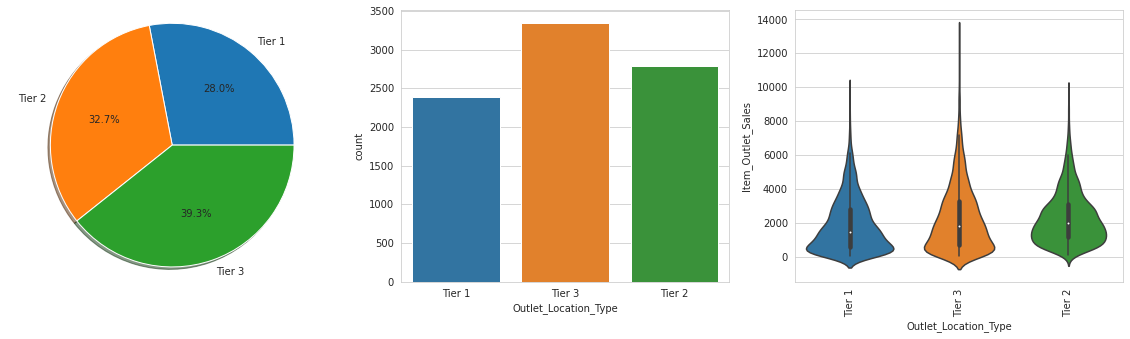

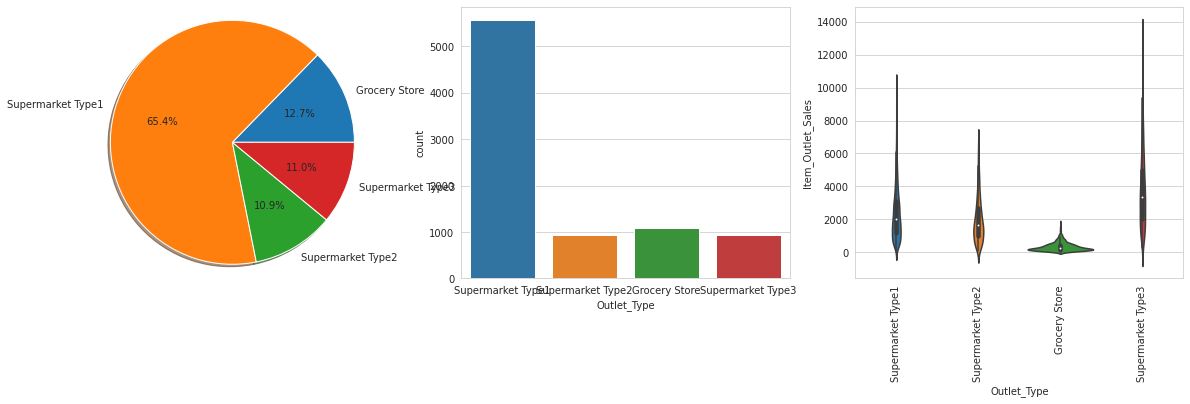

In [ ]:

for i in ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
  labels = df[i].astype('category').cat.categories.tolist()
  counts = df[i].value_counts()
  sizes = [counts[var_cat] for var_cat in labels]
  fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
  ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
  ax1.axis('equal')
  plt.xlabel(i)
  sns.countplot(x=i,data=df,ax=ax2)
  sns.violinplot(y='Item_Outlet_Sales',x=i,data=df,ax=ax3)
  plt.xticks(rotation=90) 
  plt.show()

1. Item_fat_contain consists of two Categories low fat and regular.
2. Sales of chocolate 10 and 19 are lower than others
3. Number of Outlet size as high is low
4. The number of outlet in T3 City  is the highest   
5. Only lower value products are sold at the outlet as grocery type 
6. Further, all the variables need to be analyzed with sales and Store



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

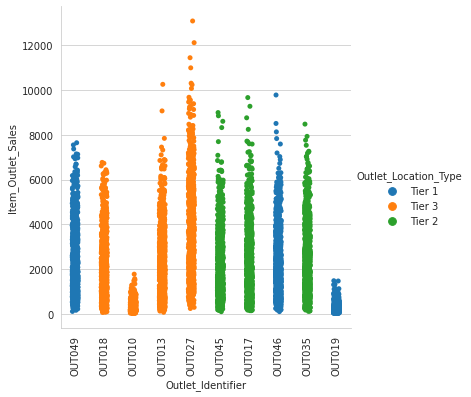

In [ ]:
sns.catplot(y='Item_Outlet_Sales',x='Outlet_Identifier',hue='Outlet_Location_Type',data=df)
plt.xticks(rotation=90) 

1. Outlet number 49,46 and 19 are located in Tier 1 cities
2. Outlet  Number 18,10, 13,27 are located in Tier 3 City
3. Outlet number 45, 17, and 35 are located in Tier 2 city


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

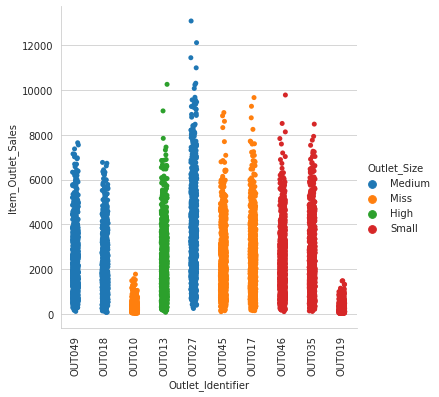

In [ ]:
sns.catplot(y='Item_Outlet_Sales',x='Outlet_Identifier',hue='Outlet_Size',data=df)
plt.xticks(rotation=90) 

1. Outlet number 47, 18 and 27 are of middle size 
2. Outlet number 1045 and 17 are having missing data on the size
3. Outlet number 27 has the largest size among all 
4. Outlet number 46, 35 and 19 are of small size
5. Outlet number 10 belongs to small size


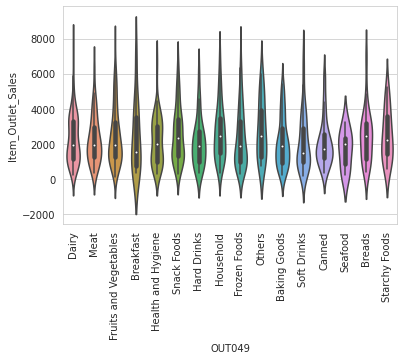

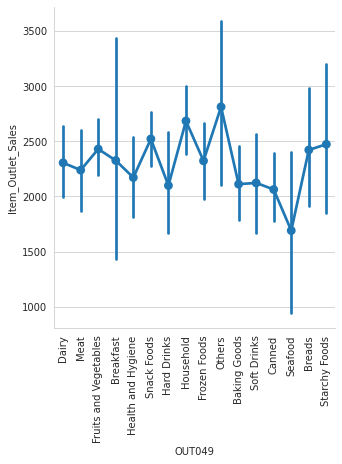

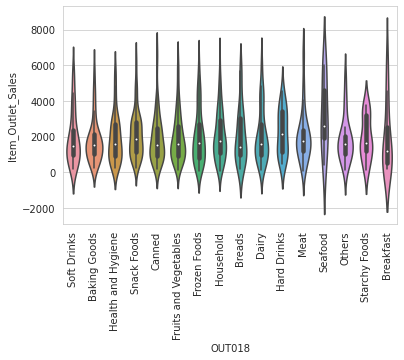

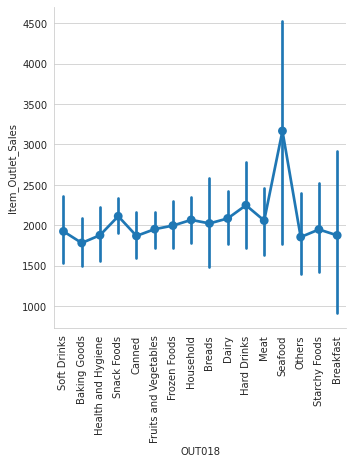

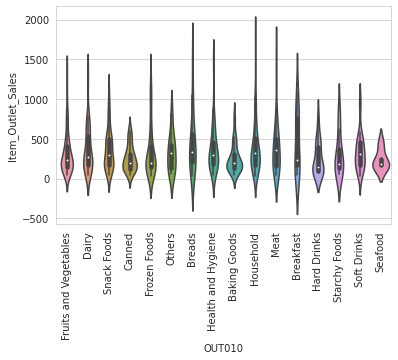

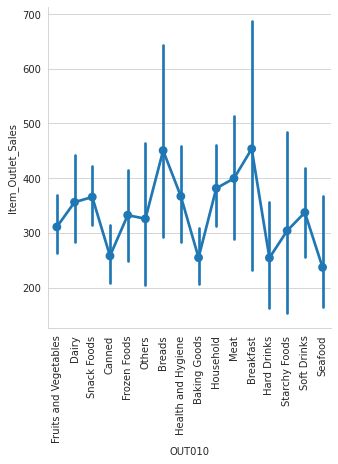

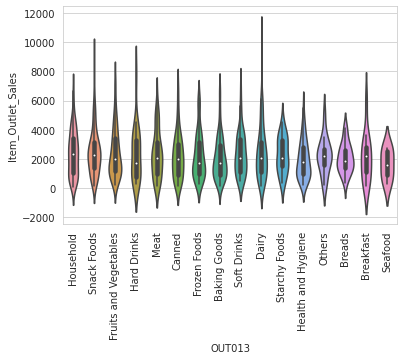

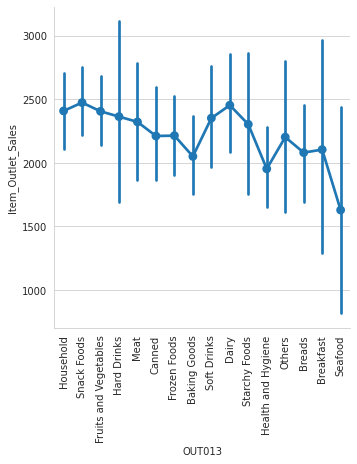

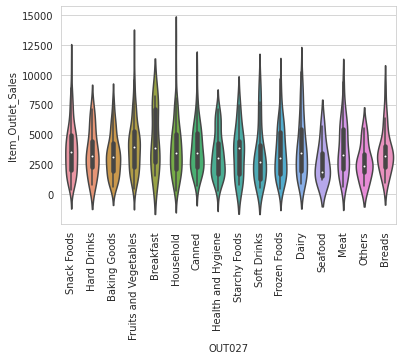

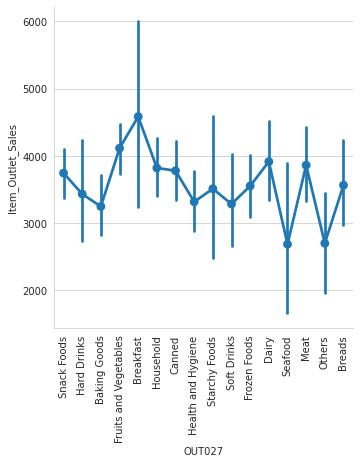

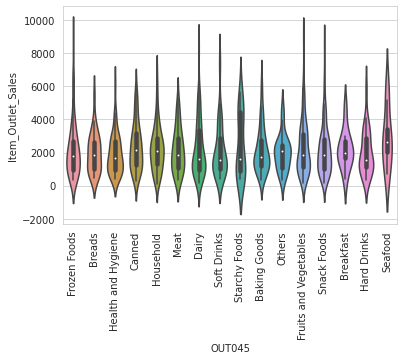

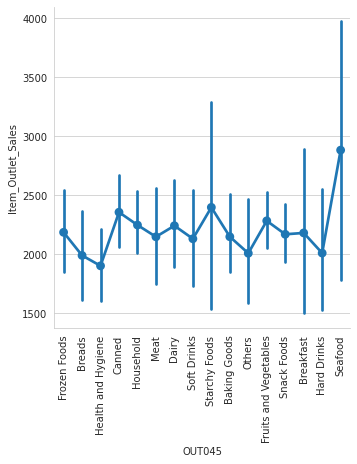

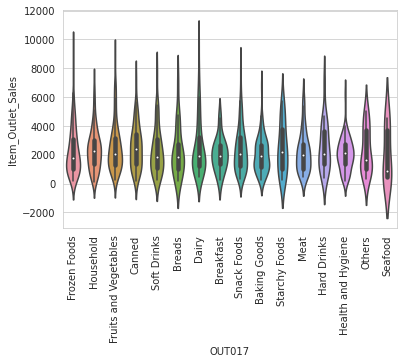

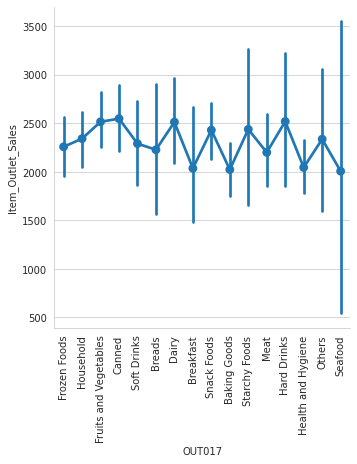

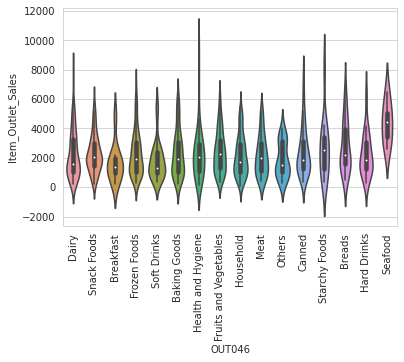

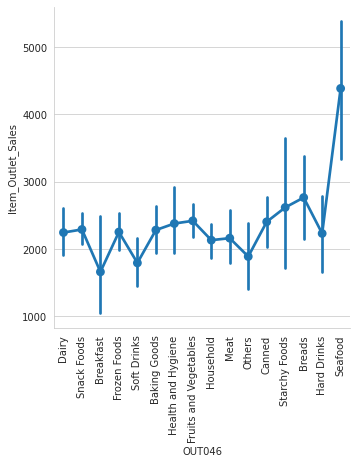

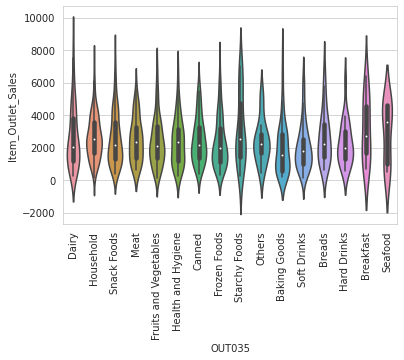

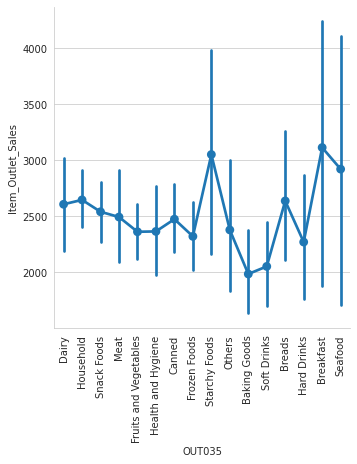

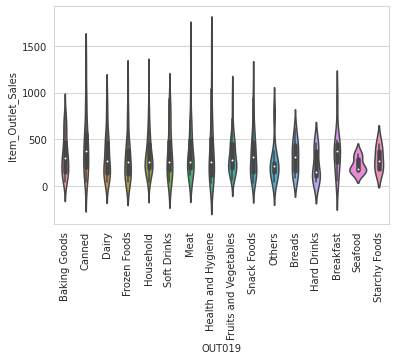

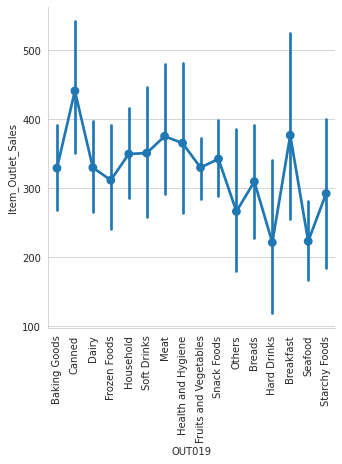

In [ ]:
for i in df['Outlet_Identifier'].unique():
  #plt.figure(figsize=(15,5))
  temp=df.loc[df['Outlet_Identifier']==i]
  #plt.subplot(1,2,1)
  sns.violinplot(y='Item_Outlet_Sales',x='Item_Type',data=temp)
  plt.xticks(rotation=90) 
  plt.xlabel(i)
  #plt.subplot(1,2,2)
  sns.factorplot(y='Item_Outlet_Sales',x='Item_Type',data=temp)
  plt.xticks(rotation=90) 
  plt.xlabel(i)
  plt.show()


1. Outlet number 18 has highest sale of sea food
2. Outlet number 49 and  as highest sale of others catagories 
3. Outlet number 49 has Widest distribution in breakfast category
4. Outlet number 10 has highest Mean sales of breakfast and breads and their distribution are also high.
5. Outlet number 13 has highest  mean sale of snacks and widest distribution of  hard drink, Second peak can be observed with daily as highest  mean sales and breakfast as widest distribution.
6. Outlet number 27 has highest  mean and widest range of distribution for breakfast category followed by fruits and vegetables.
7. Outlet number 45 and 46 has highest  mean and widest range of distribution for seafood category.
8. Outlet number 17 has highest mean  sale as canned food and  widest distribution of sales as seafood
9. Number 35 has highest means sales of breakfast followed by  starchy food.
10. Outlet number 19 has highest means sales of breakfast followed by canned food 


In [117]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

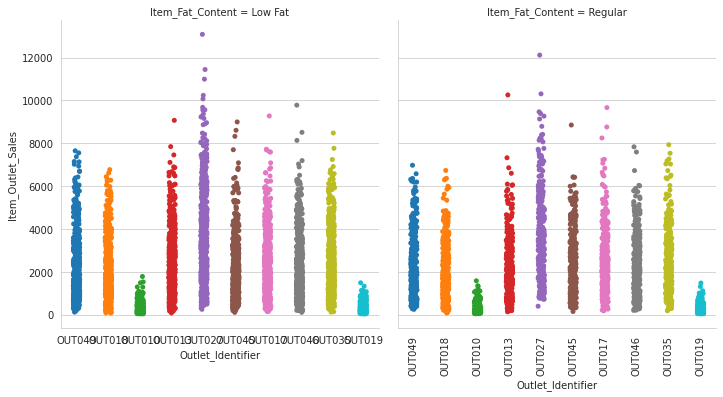

In [ ]:

sns.catplot(y='Item_Outlet_Sales',x='Outlet_Identifier',col='Item_Fat_Content',data=df)
plt.xticks(rotation=90) 

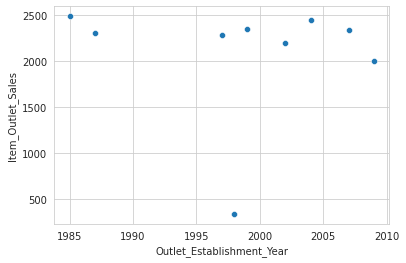

In [ ]:
demo=df[['Outlet_Establishment_Year', 'Item_Outlet_Sales']].groupby(['Outlet_Establishment_Year'], as_index=False).mean()
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=demo)

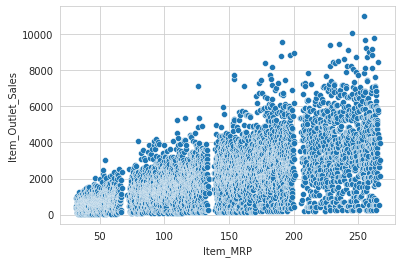

In [ ]:
demo=df[['Item_MRP', 'Item_Outlet_Sales']].groupby(['Item_MRP'], as_index=False).mean()
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=demo)

In [118]:
year=[]
size=[]
loc=[]
sale=[]
typ=[]
for i in df['Outlet_Identifier'].unique():
  year.append(df['Outlet_Establishment_Year'].loc[df['Outlet_Identifier']==i].mean())
  size.append(df['Outlet_Size'].loc[df['Outlet_Identifier']==i].unique())
  loc.append(df['Outlet_Location_Type'].loc[df['Outlet_Identifier']==i].unique())
  typ.append(df['Outlet_Type'].loc[df['Outlet_Identifier']==i].unique())
  sale.append(df['Item_Outlet_Sales'].loc[df['Outlet_Identifier']==i].mean())
  
  
outlet=pd.DataFrame([df['Outlet_Identifier'].unique(),year,size,loc,typ,sale]).T
outlet.columns=['Name','year','size','loc','type','sale']

In [12]:
outlet.sort_values(by='sale')

Name  year      size       loc                 type     sale
2  OUT010  1998    [Miss]  [Tier 3]      [Grocery Store]  339.352
9  OUT019  1985   [Small]  [Tier 1]      [Grocery Store]   340.33
1  OUT018  2009  [Medium]  [Tier 3]  [Supermarket Type2]   1995.5
5  OUT045  2002    [Miss]  [Tier 2]  [Supermarket Type1]  2192.38
7  OUT046  1997   [Small]  [Tier 1]  [Supermarket Type1]  2277.84
3  OUT013  1987    [High]  [Tier 3]  [Supermarket Type1]     2299
6  OUT017  2007    [Miss]  [Tier 2]  [Supermarket Type1]  2340.68
0  OUT049  1999  [Medium]  [Tier 1]  [Supermarket Type1]  2348.35
8  OUT035  2004   [Small]  [Tier 2]  [Supermarket Type1]  2438.84
4  OUT027  1985  [Medium]  [Tier 3]  [Supermarket Type3]  3694.04

1. year of built is directly affecting the sales if size of outlet is middle 
2. it will be better to replace miss with Small because of the similarities

In [119]:
df['Outlet_Size']=df['Outlet_Size'].replace('Miss','Small')
test['Outlet_Size']=test['Outlet_Size'].replace('Miss','Small')

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

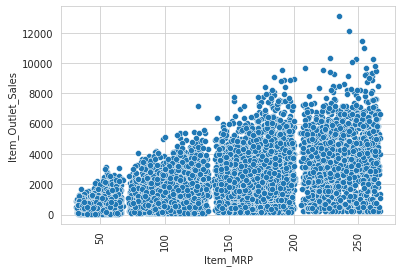

In [14]:
sns.scatterplot(y='Item_Outlet_Sales',x='Item_MRP',data=df)
plt.xticks(rotation=90) 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [120]:
mrp=[]
weight=[]
vis=[]
sale=[]
for i in df['Item_Identifier'].unique():
  mrp.append(df['Item_MRP'].loc[df['Item_Identifier']==i].mean())
  weight.append(df['Item_Weight'].loc[df['Item_Identifier']==i].mean())
  vis.append(df['Item_Visibility'].loc[df['Item_Identifier']==i].mean())
  sale.append(df['Item_Outlet_Sales'].loc[df['Item_Identifier']==i].mean())
  
  
item=pd.DataFrame([df['Item_Identifier'].unique(),mrp,weight,vis,sale]).T
item.columns=['Name','mrp','weight','viz','sale']

In [121]:
item['Number']=item['sale']/item['mrp']
item.sort_values(by='Number')

Name      mrp   weight        viz     sale    Number
1539  FDQ60   121.21    12.85   0.191501   120.51  0.994225
1419  NCR42    33.69    9.105  0.0472234  110.967   3.29376
893   FDY43  169.747    14.85  0.0988031   673.79   3.96937
597   FDY09  174.272  14.7667  0.0372149  700.422   4.01913
1178  NCD43  105.621  10.5625  0.0217305  499.683   4.73089
...     ...      ...      ...        ...      ...       ...
1012  NCM18  60.8194       12  0.0828071  1836.94   30.2032
1544  NCV18   84.425    6.775   0.105343  2829.65   33.5167
1130  FDK57  120.044    19.35  0.0799041  4434.23   36.9384
1494  FDE52  88.9514     10.5  0.0297421   3453.5   38.8246
316   FDU09  54.7456   8.7025  0.0664877  2129.23   38.8931

[1559 rows x 6 columns]

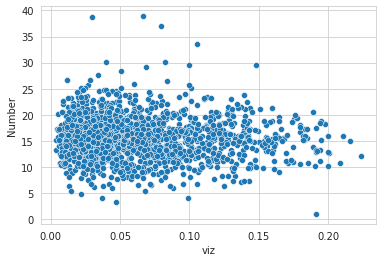

In [ ]:
sns.scatterplot(x='viz',y='Number',data=item)

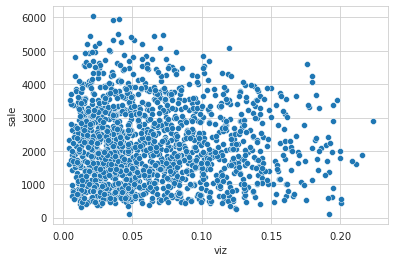

In [ ]:
sns.scatterplot(x='viz',y='sale',data=item)

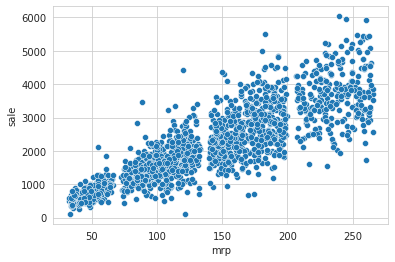

In [ ]:
sns.scatterplot(x='mrp',y='sale',data=item)

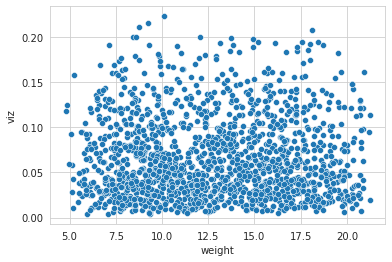

In [ ]:
sns.scatterplot(x='weight',y='viz',data=item)

1. mrp is directly related to sales
2. visibility not related to sales or number

Data filtering:-

In [122]:
def strip(df,feature):
  k=[]
  for i in df[feature]:
    k.append(i[0:2])
  return(k)


In [123]:
item['catagory']=strip(item,'Name')

In [124]:
df['catagory']=strip(df,'Item_Identifier')

In [125]:
test['catagory']=strip(test,'Item_Identifier')

In [126]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
test['Outlet_Years'] = 2013 - test['Outlet_Establishment_Year']

In [22]:
df.head()

Item_Identifier  Item_Weight  ... catagory  Outlet_Years
0           FDA15         9.30  ...       FD            14
1           DRC01         5.92  ...       DR             4
2           FDN15        17.50  ...       FD            14
3           FDX07        19.20  ...       FD            15
4           NCD19         8.93  ...       NC            26

[5 rows x 14 columns]

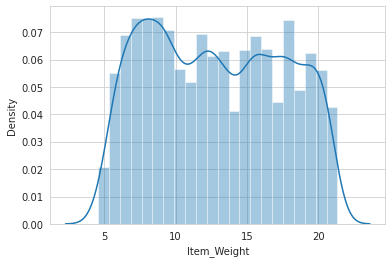

In [ ]:
sns.distplot(df['Item_Weight'] )

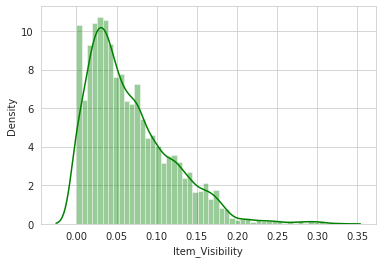

In [ ]:
sns.distplot(df['Item_Visibility'] , color = 'green')

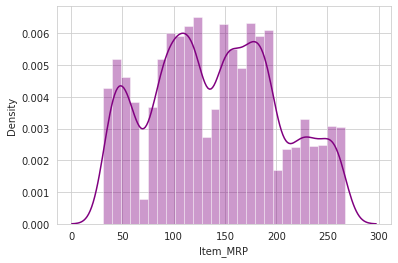

In [ ]:
sns.distplot(df['Item_MRP'] , color = 'purple')

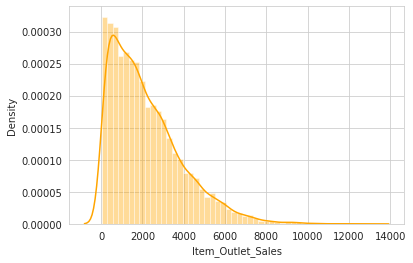

In [ ]:
sns.distplot(df['Item_Outlet_Sales'] , color = 'orange')

In [127]:
from sklearn.preprocessing import power_transform as PT

def p_trns(df,features):
  pt=pd.DataFrame()
  for i in features:
    if df[i].min()<=0:
      pt1=(df[i]-df[i].min()+0.0001)
    else:
      pt1=df[i]
    pt=pd.concat([pt,pd.DataFrame(pt1)],axis=1)
  pt1=PT(pt)
  pt1=pd.DataFrame(pt1,columns=features)
  return(pt1)



In [128]:
pt1=p_trns(df,['Item_Outlet_Sales','Item_MRP','Item_Visibility','Item_Weight'])
ptest=p_trns(test,['Item_MRP','Item_Visibility','Item_Weight'])

In [129]:
df_stan=pd.concat([df.drop(['Item_Outlet_Sales','Item_MRP','Item_Visibility','Item_Weight'],axis=1),pt1],axis=1)
test_stan=pd.concat([test.drop(['Item_MRP','Item_Visibility','Item_Weight'],axis=1),ptest],axis=1)

In [130]:
df_stan.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)
test_stan.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [131]:
def pplot(df,i):
  plt.figure(figsize=(20,5))
  plt.subplot(1,3,1)
  
  sns.histplot(x=i,data=df,kde=True)
  plt.subplot(1,3,2)
  stat.probplot(df[i],dist='norm',plot=pylab)
  plt.subplot(1,3,3)
  sns.boxplot(y=i,data=df)
  plt.show()

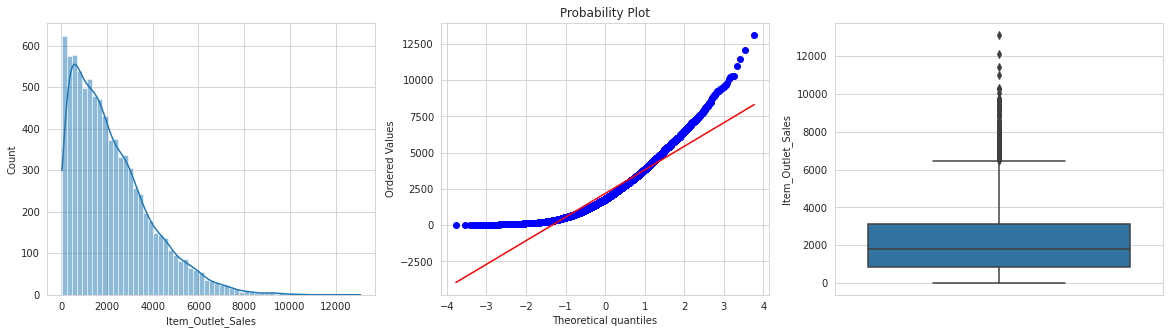

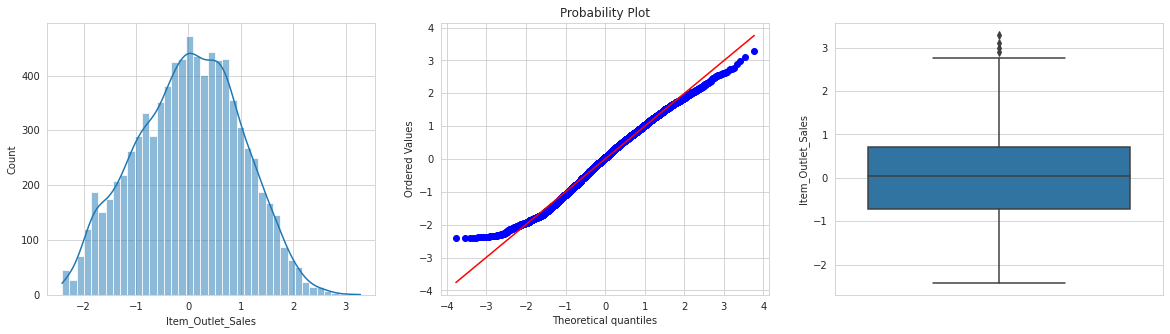

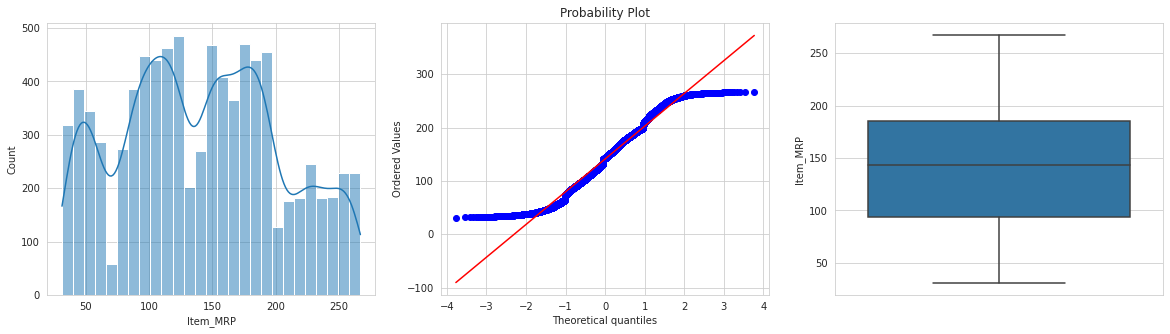

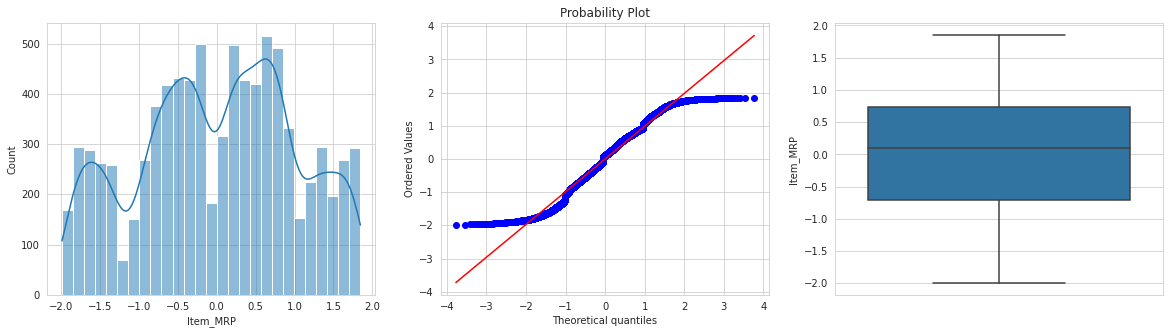

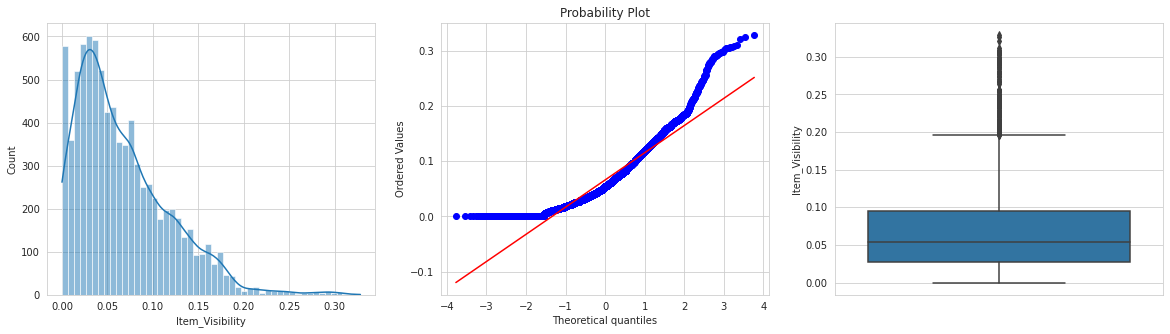

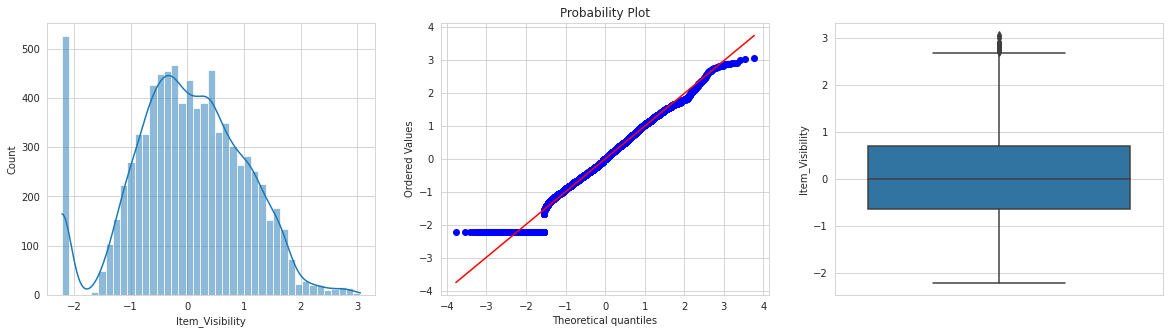

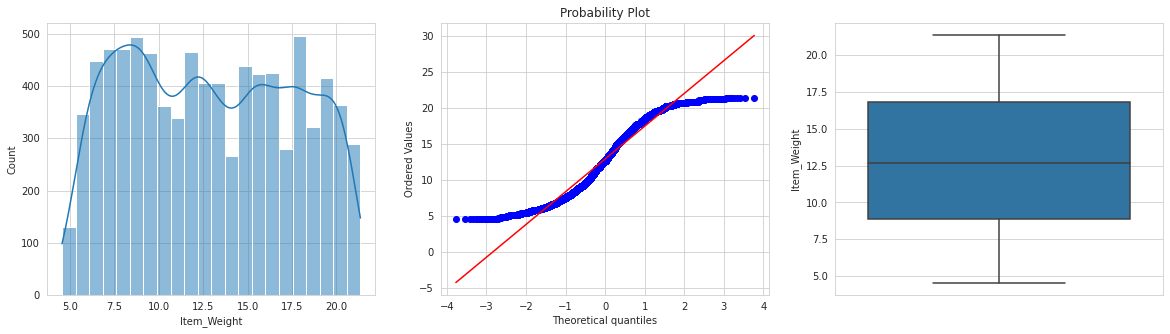

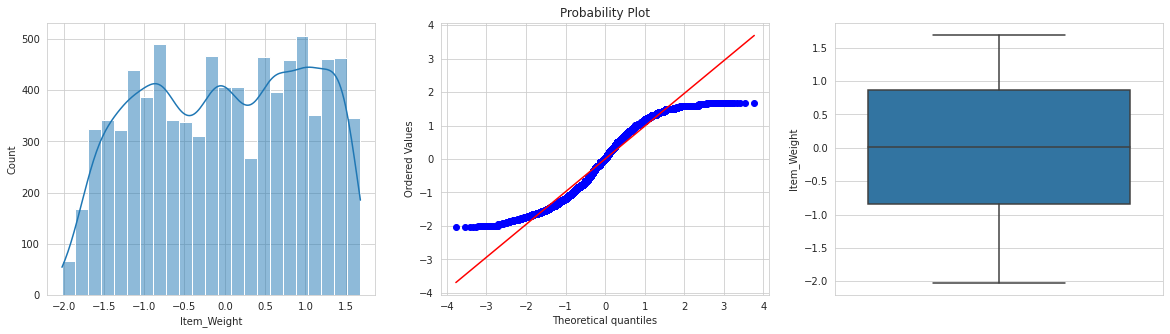

In [37]:
import scipy.stats as stat
import pylab 
num=['Item_Outlet_Sales','Item_MRP','Item_Visibility','Item_Weight']
for i in num:
  pplot(df,i)
  pplot(pt1,i)

## **Encoding**:- categories are encoded according to the percentage of value represents edible class (percentage encoding)

In [132]:
df_stan.head()

Item_Identifier Item_Fat_Content  ... Item_Visibility Item_Weight
0           FDA15          Low Fat  ...       -1.001673   -0.719917
1           DRC01          Regular  ...       -0.883789   -1.608343
2           FDN15          Low Fat  ...       -0.974648    1.000792
3           FDX07          Regular  ...       -2.213062    1.311968
4           NCD19          Low Fat  ...       -2.213062   -0.809874

[5 rows x 13 columns]

In [133]:

df_stan.drop(['Item_Identifier'],axis=1,inplace=True)
test_stan.drop(['Item_Identifier'],axis=1,inplace=True)


As item coding of test and train dataset are not same 

In [134]:
df_cat=df_stan[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','catagory']]
test_cat=test_stan[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','catagory']]
df_encoding=pd.concat([pd.get_dummies(df_cat,drop_first=True),df_stan.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','catagory'],axis=1)],axis=1)
test_encoding=pd.concat([pd.get_dummies(test_cat,drop_first=True),test_stan.drop(['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','catagory'],axis=1)],axis=1)


## **Changing Data type**

In [45]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 1   Item_Fat_Content_Regular         8523 non-null   uint8  
 2   Item_Fat_Content_low fat         8523 non-null   uint8  
 3   Item_Fat_Content_reg             8523 non-null   uint8  
 4   Item_Type_Breads                 8523 non-null   uint8  
 5   Item_Type_Breakfast              8523 non-null   uint8  
 6   Item_Type_Canned                 8523 non-null   uint8  
 7   Item_Type_Dairy                  8523 non-null   uint8  
 8   Item_Type_Frozen Foods           8523 non-null   uint8  
 9   Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 10  Item_Type_Hard Drinks            8523 non-null   uint8  
 11  Item_Type_Health and Hygiene     8523 non-null   uint8  
 12  Item_Type_Household 

## **Correlation**

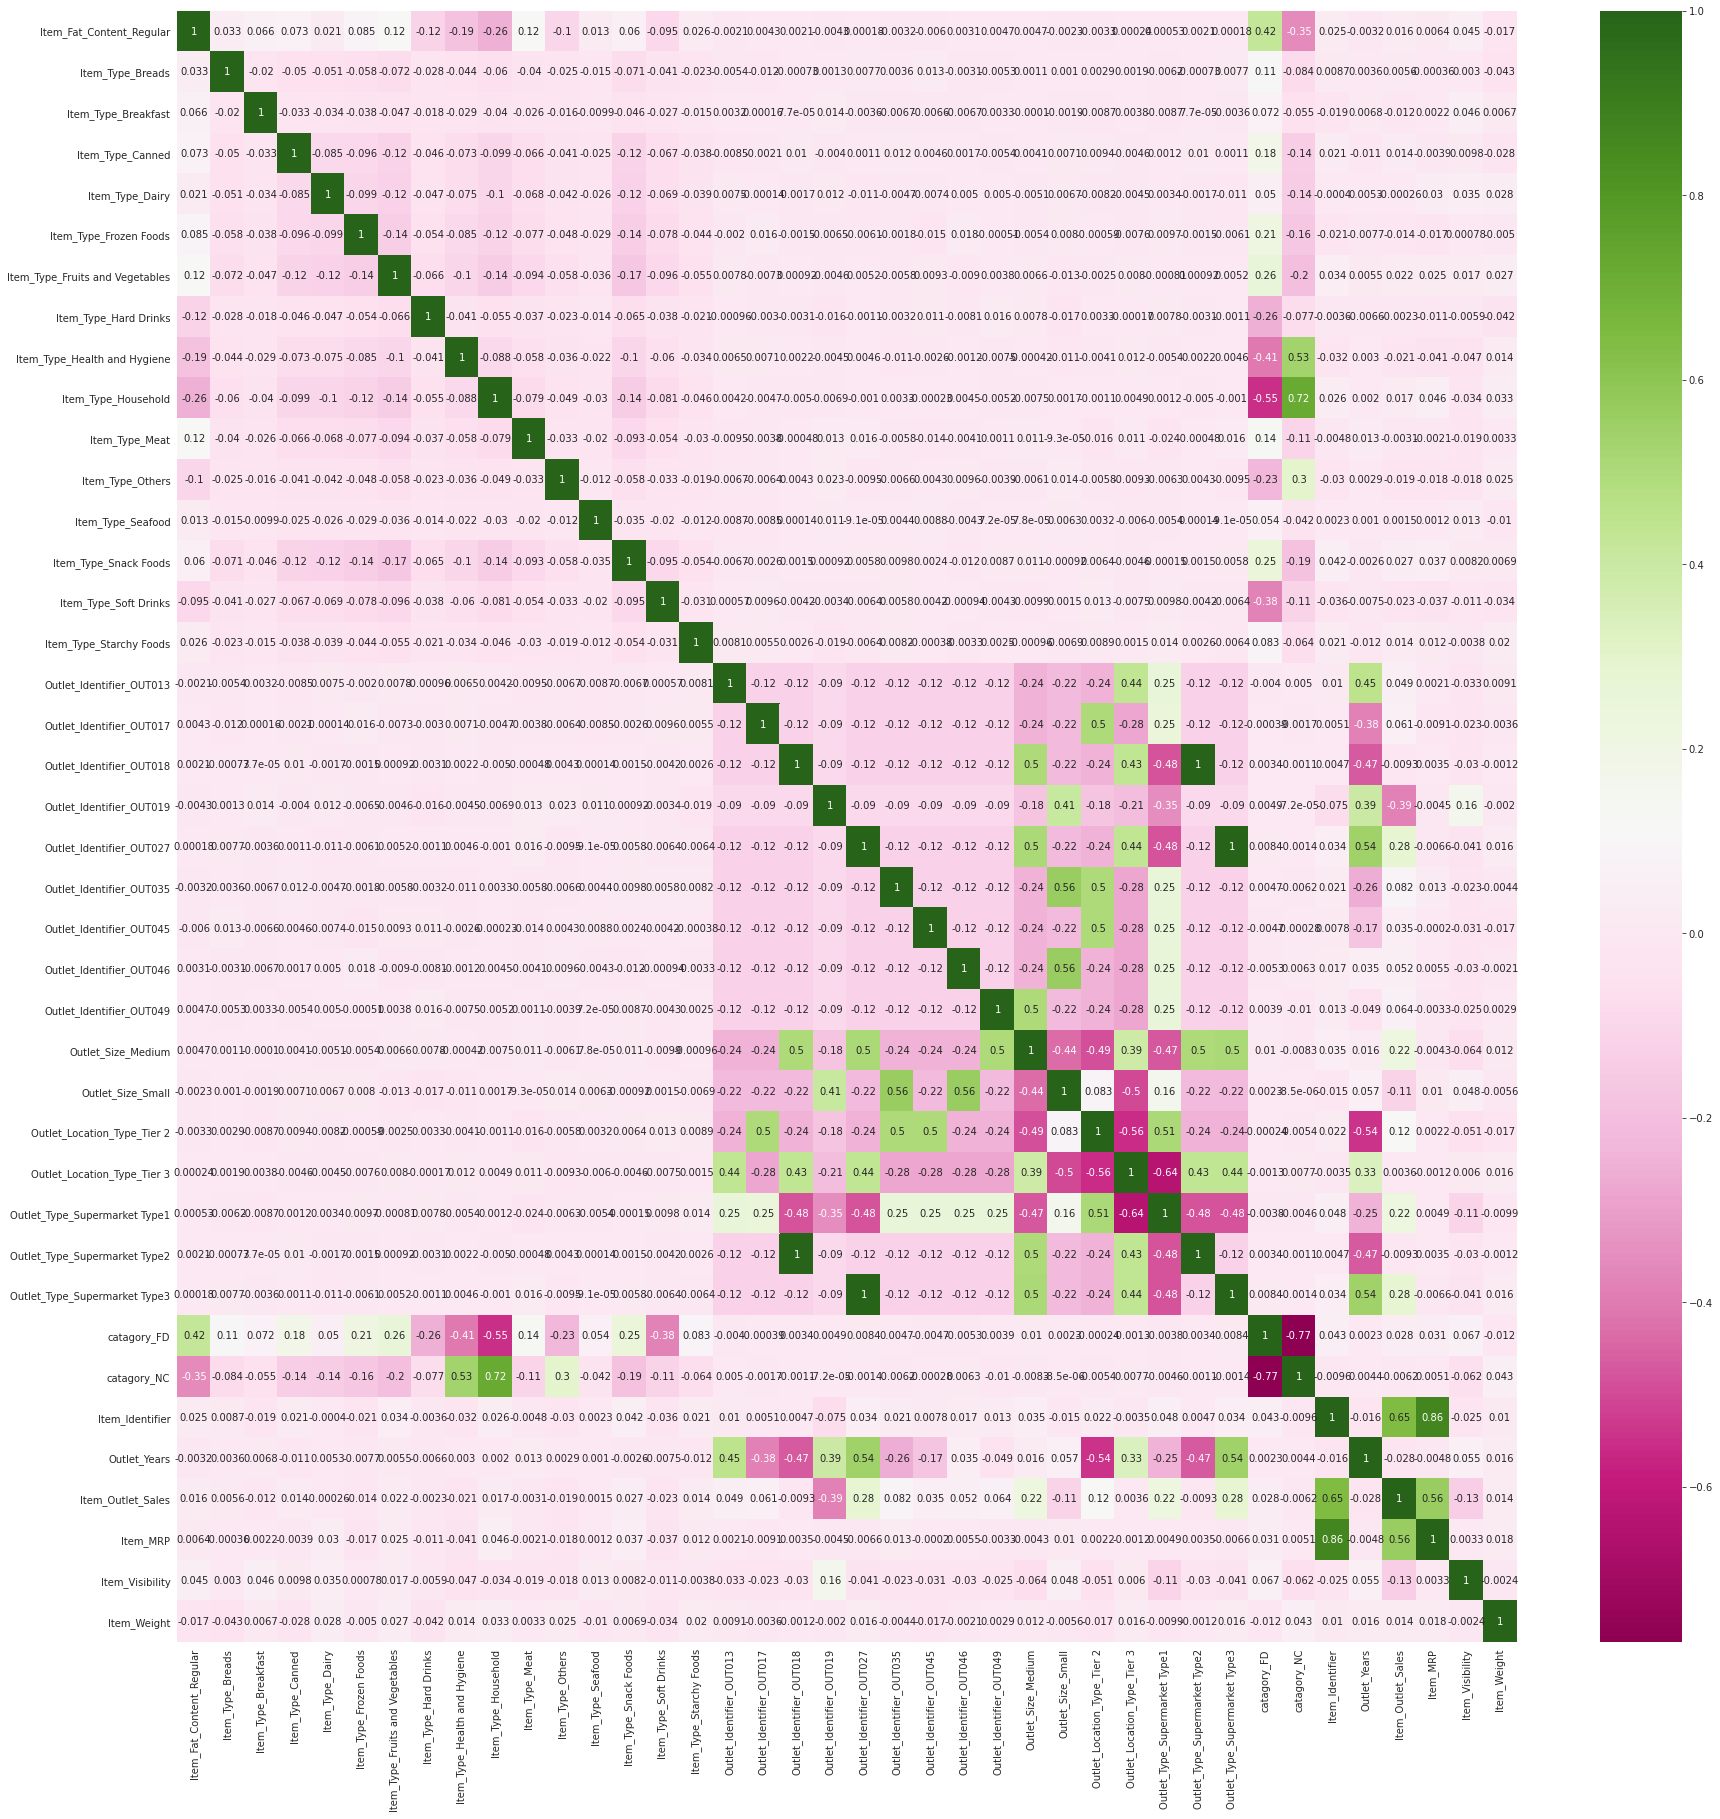

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df_encoding.corr(),annot=True,cmap='PiYG')

corilation is not a sutaible method for selecting catagorical variable. item_identifier and mrp are linearly related with sales

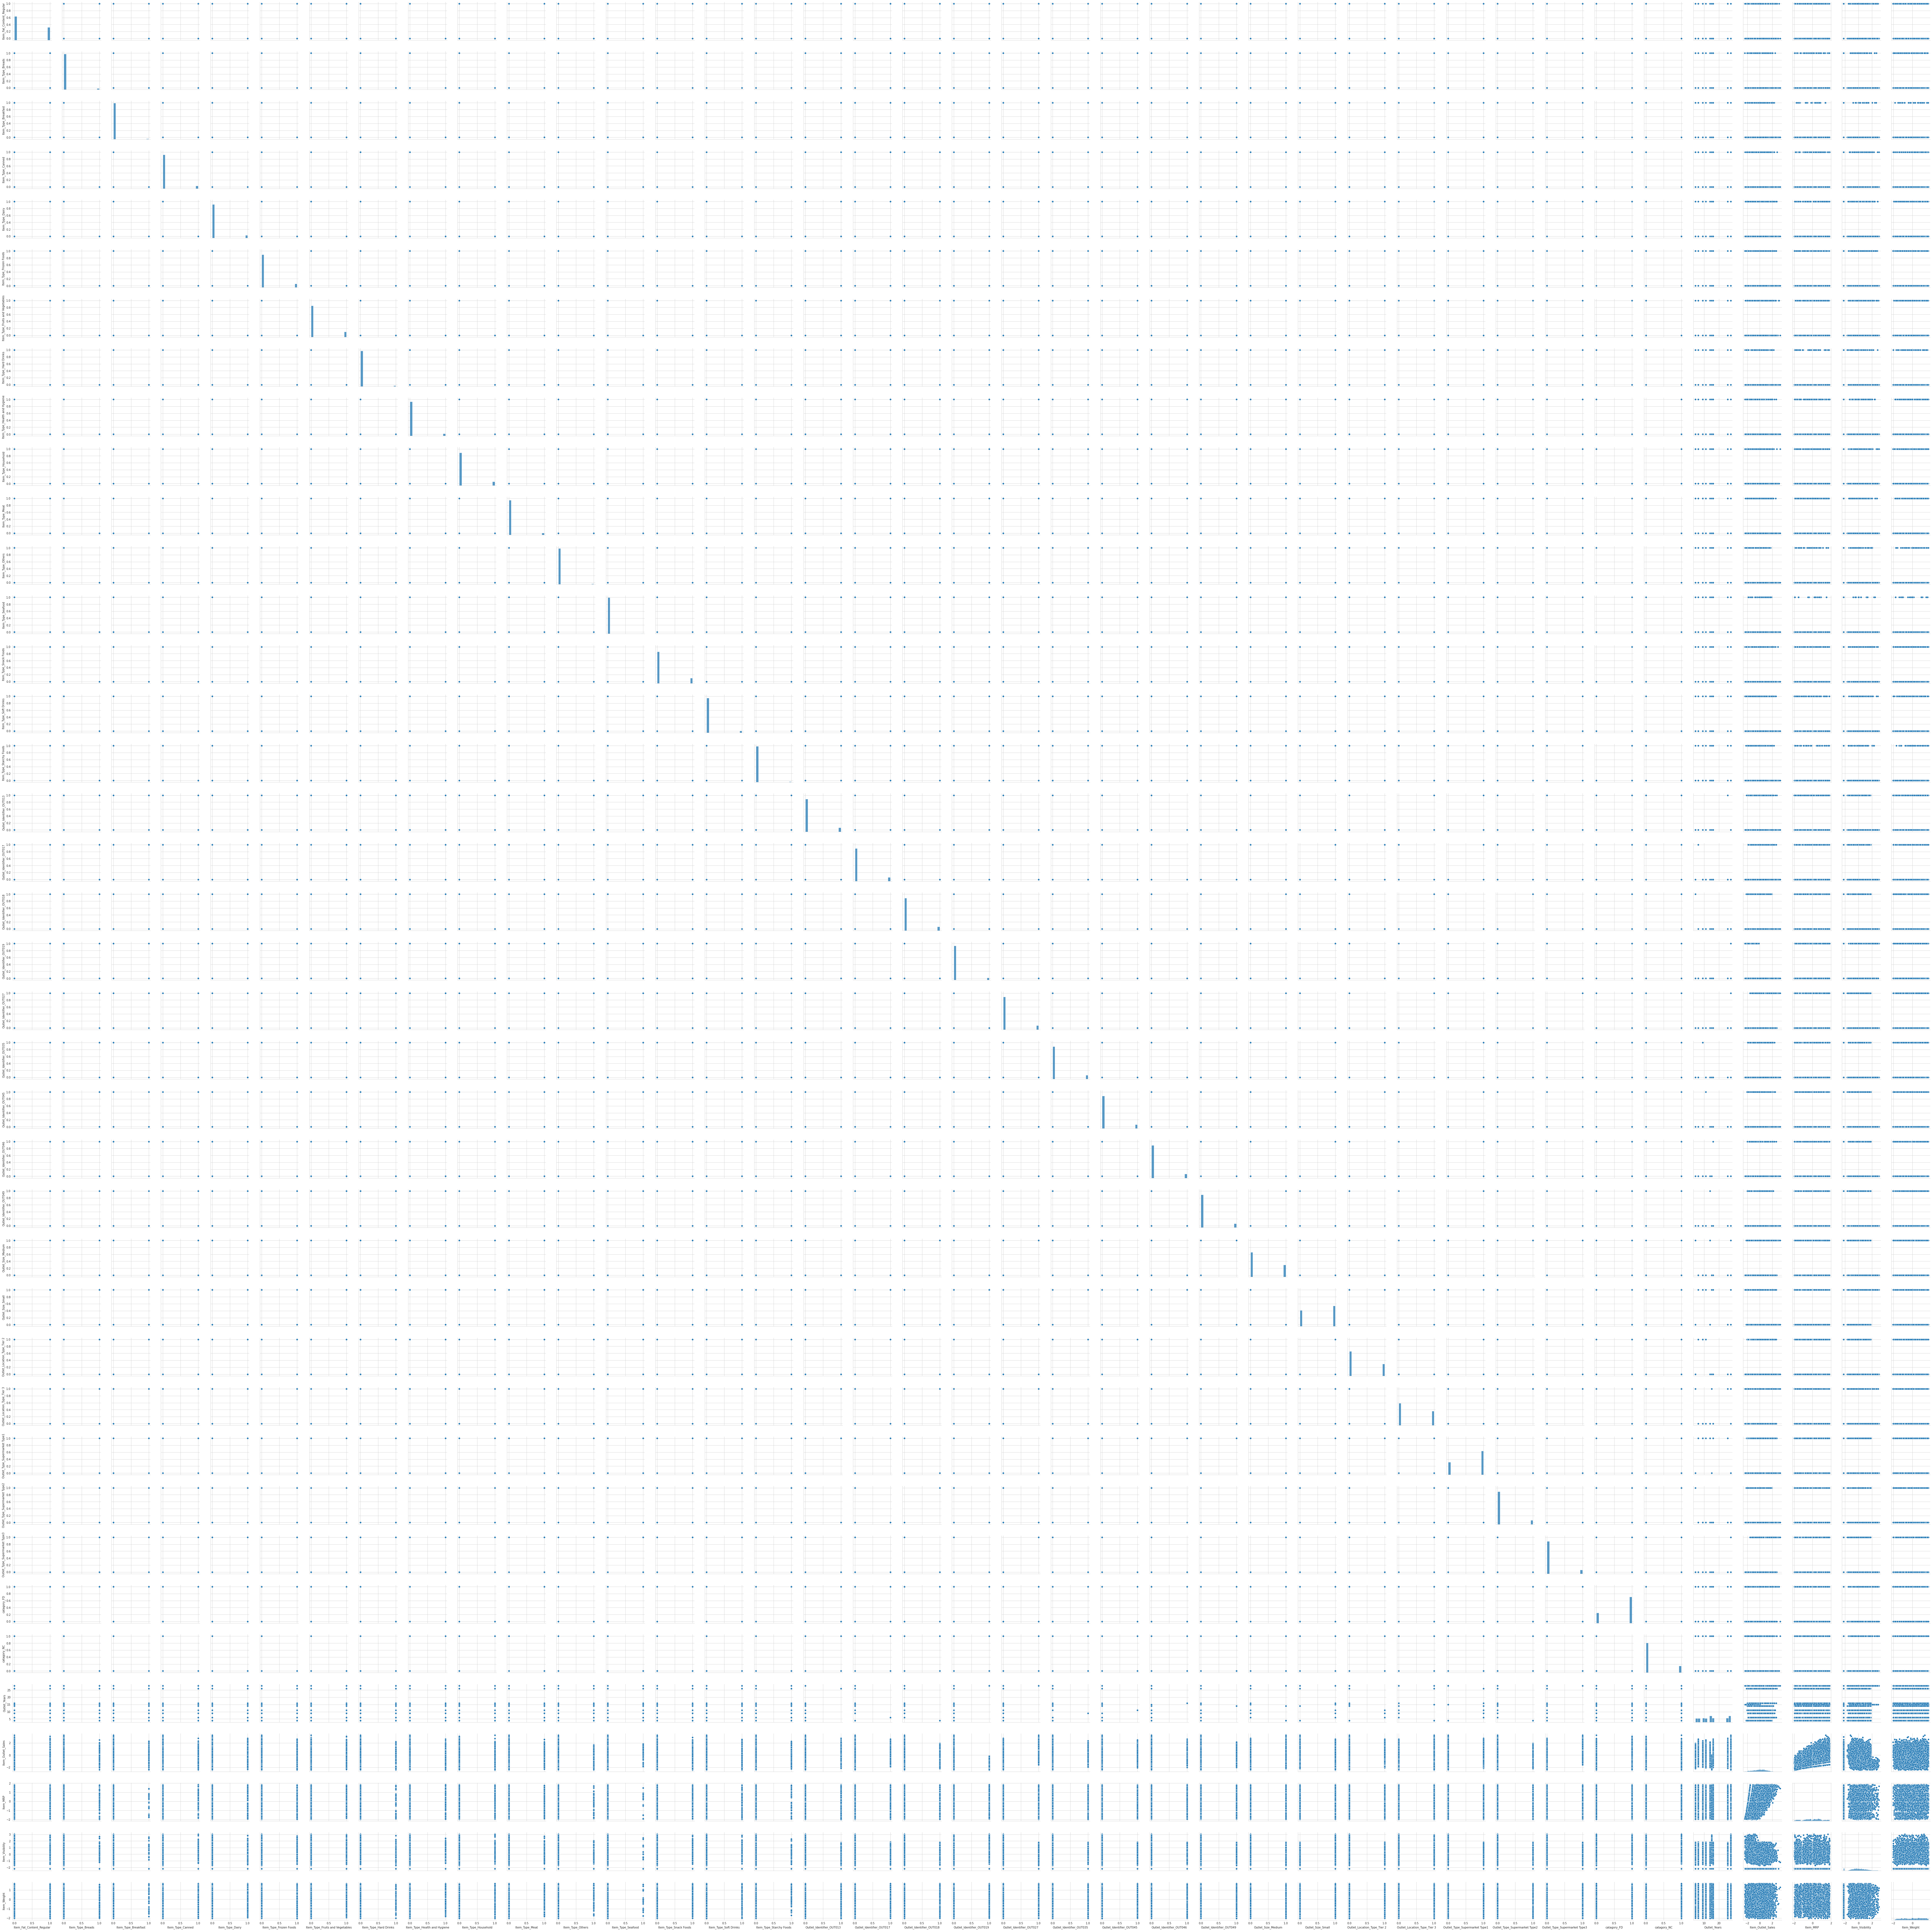

In [172]:
sns.pairplot(df_encoding)

## **Anova test**

In [135]:
y=df_encoding['Item_Outlet_Sales']
x=df_encoding.drop(['Item_Outlet_Sales'],axis=1)

In [136]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif as anova
s = SelectKBest(anova, k=37)
s.fit(x,y)

SelectKBest(k=37, score_func=<function f_classif at 0x7f335dfd4b90>)

In [137]:
pd.DataFrame([s.scores_,s.pvalues_],columns=x.columns).T.sort_values(by=0)

0             1
Item_Type_Others                 0.804951  1.000000e+00
Outlet_Identifier_OUT045         0.878763  9.999818e-01
Outlet_Identifier_OUT018         0.897767  9.997176e-01
Outlet_Type_Supermarket Type2    0.897767  9.997176e-01
Item_Type_Seafood                0.909432  9.988027e-01
Outlet_Identifier_OUT017         0.948086  9.560493e-01
Outlet_Identifier_OUT013         0.984264  6.939302e-01
Outlet_Identifier_OUT049         0.989507  6.317965e-01
Outlet_Identifier_OUT046         0.992679  5.924810e-01
Outlet_Identifier_OUT035         1.010547  3.673964e-01
Item_Type_Health and Hygiene     1.039612  1.055901e-01
Outlet_Location_Type_Tier 3      1.055244  4.175556e-02
catagory_NC                      1.060070  3.021671e-02
Item_Type_Hard Drinks            1.061958  2.649954e-02
Outlet_Location_Type_Tier 2      1.076121  9.092924e-03
Item_Weight                      1.078575  7.441363e-03
Item_Type_Household              1.110666  3.610741e-04
catagory_FD                      1.120792  1.193527e-04
Item_Type_Soft Drinks            1.136397  1.887938e-05
Item_Type_Starchy Foods          1.141429  1.005903e-05
Outlet_Size_Small                1.153403  2.102767e-06
Item_Fat_Content_Regular         1.154757  1.751230e-06
Item_Type_Fruits and Vegetables  1.159881  8.673415e-07
Item_Visibility                  1.162526  5.995824e-07
Outlet_Size_Medium               1.171627  1.627210e-07
Item_Type_Frozen Foods           1.177909  6.419402e-08
Item_Type_Meat                   1.205000  8.861490e-10
Item_Type_Snack Foods            1.213091  2.270037e-10
Item_Type_Canned                 1.229529  1.275079e-11
Outlet_Years                     1.230003  1.170945e-11
Item_Type_Breakfast              1.253722  1.414034e-13
Item_Type_Dairy                  1.308475  1.813797e-18
Item_Type_Breads                 1.371612  7.948359e-25
Outlet_Type_Supermarket Type1    1.622408  9.060406e-56
Outlet_Identifier_OUT027         1.772926  2.408395e-77
Outlet_Type_Supermarket Type3    1.772926  2.408395e-77
Outlet_Identifier_OUT019         1.779926  2.187576e-78
Item_MRP                         3.380224  0.000000e+00

Many variable means does not vary with respect to sales but their mean  may vary with respect to items and their sales. So, analyzing feature importance of feature selection with the ANOVA  test for this data set is not appropriate. The inference can be made that the variable having P value less than 0.05 Will has a variation with respect to sales. 

## **Separating dependent and independent variables**

In [150]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.1,random_state=42)

In [143]:
from sklearn.preprocessing import StandardScaler as SS
ss=SS()
x_train_scaler=ss.fit_transform(x_train)
x_test_scaler= ss.transform(x_test)

In [144]:
import scipy.stats as stat
import pylab 
def z_outlier(a,b):
  df_z=pd.concat([a,b],axis=1)
  z=np.abs(stat.zscore(df_z[num]))
  a=int(df_z.size)
  df_z = df_z[(z<3).all(axis=1)]
  print('Percent of data retained = '+ str(int(df_z.size)/a))
  x_z=df_z.drop('Item_Outlet_Sales',axis=1)
  y_z=df_z.Item_Outlet_Sales
  return(x_z,y_z)

In [145]:
x_train,y_train=z_outlier(x_train,y_train)


Percent of data retained = 1.0


In [146]:
x_train_scaler= ss.transform(x_train)

# **Model Evaluation**

## **Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression as lr
reg_lr = lr(normalize=True).fit(x_train,y_train)
y_pred=reg_lr.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

-7.013236019056137e+26
6.945206733081348e+26


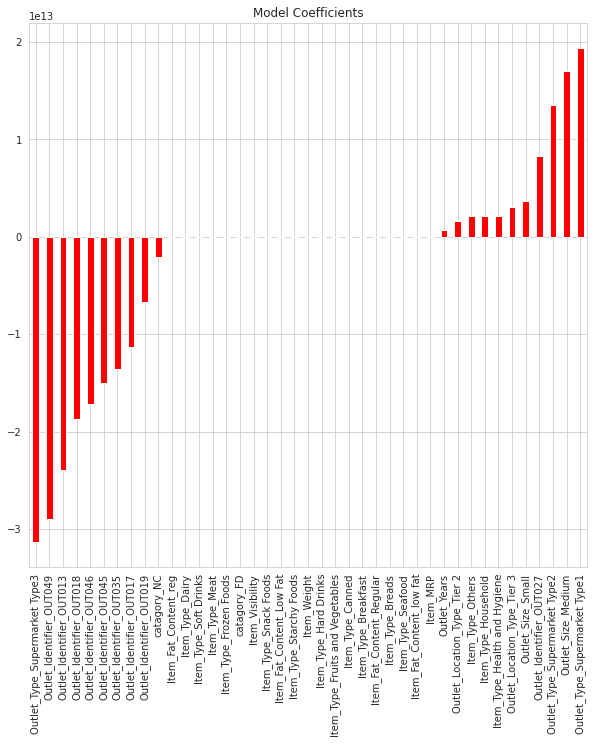

In [55]:
coef = pd.Series(reg_lr.coef_, x.columns).sort_values()
plt.figure(figsize=(10,10))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

## **Random Forest Regressor**(0.66)

In [56]:
from sklearn.ensemble import RandomForestRegressor as RFR 
reg_rfc = RFR().fit(x_train, y=y_train)
y_pred=reg_rfc.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.6769132743380324
0.3199527431188171


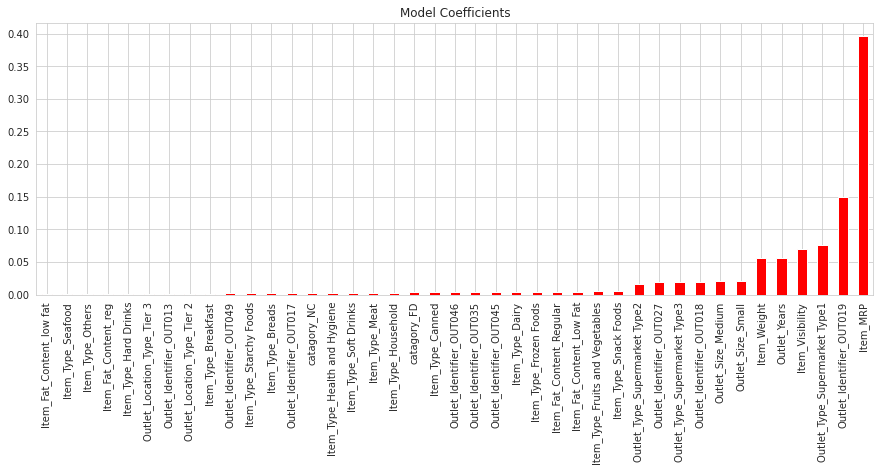

In [57]:
coef = pd.Series(reg_rfc.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [58]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(RFR(), x, y, cv=10)

rfc_score=cv_results['test_score'].mean()


In [59]:
rfc_score

0.6603567619366728

## **XGB Regressor**(0.694)

In [60]:
from xgboost import XGBRegressor as XBR
xgr=XBR().fit(x_train,y_train)

y_pred = xgr.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))


[01:21:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7133237443653926
0.2838954593055295


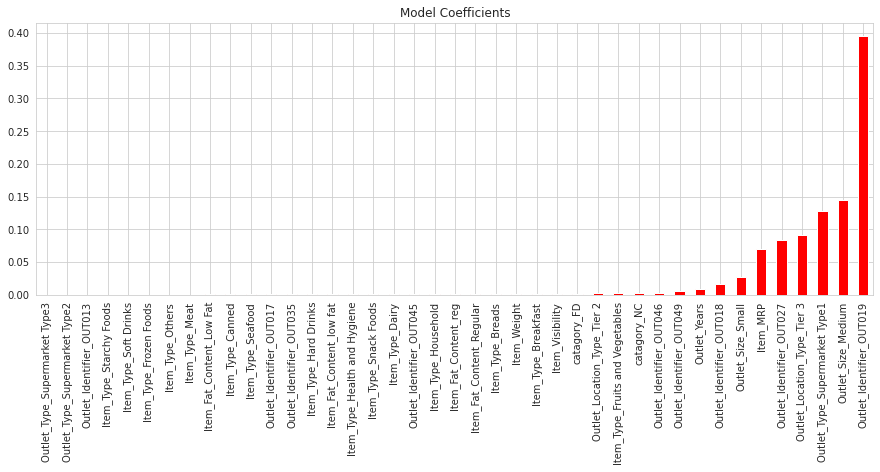

In [61]:
coef = pd.Series(xgr.feature_importances_, x.columns).sort_values()
plt.figure(figsize=(15,5))
coef.plot(kind='bar', title="Model Coefficients" , color = 'red')

In [62]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(), x, y, cv=10)

xgr_score=cv_results['test_score'].mean()




[01:21:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:21:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [63]:
xgr_score

0.693994875818962

## **Extra Tree Regressor**(0.38)

In [64]:
from sklearn.tree import ExtraTreeRegressor as ETR 

etr = ETR()
etr.fit(x_train, y_train)
y_pred=etr.predict(x_test)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.3841382349330621
0.6098878272124528


In [65]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ETR(), x, y, cv=10)

etc_score=cv_results['test_score'].mean()


In [66]:
etc_score

0.37973709241279247

## **Support vector Regressor**(0.67)

In [67]:
from sklearn.svm import SVR

svc = SVR()
svc.fit(x_train_scaler, y_train)
y_pred=svc.predict(x_test_scaler)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y_test,y_pred))
print(rms(y_test,y_pred))

0.6943034603999432
0.30273124408491253


In [68]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(), ss.transform(x), y, cv=10)

svc_score=cv_results['test_score'].mean()


In [69]:
svc_score

0.6713599881239825

## **Comparing models**

In [70]:
score=[rfc_score,etc_score,xgr_score,svc_score]
name=['RFC','ETC','XGR','SVC']
pd.DataFrame([name,score]).T

0         1
0  RFC  0.660357
1  ETC  0.379737
2  XGR  0.693995
3  SVC   0.67136

# **Hyper-parameter tuning** 

## **XG Boost**(0.694)




In [82]:
from sklearn.model_selection import GridSearchCV

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
xgb_model = XBR()

gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
gsearch.fit(x_train,y_train)



Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 29.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 49.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 61.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1],
                         'ma

In [83]:
print('Best score:', gsearch.best_score_)
print('Best score:', gsearch.best_params_)
print('Best score:', gsearch.best_estimator_)

Best score: 0.6923222475795077
Best score: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}
Best score: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1)


In [151]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1), x, y, cv=10)

hp_XBC=cv_results['test_score'].mean()

In [152]:
hp_XBC

0.6937262975899868

In [157]:
xbr=XBR(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7, verbosity=1).fit(x_train,y_train)

## **Support vector classifier**(0.684)




In [73]:
from sklearn.model_selection import GridSearchCV

params={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
 'C':[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.05,0.1,0.5,1,2,5]}

svc_grid = GridSearchCV(SVR(), params, cv=3)
svc_grid.fit(ss.transform(x), y)

print('Best score:', svc_grid.best_score_)
print('Best score:', svc_grid.best_params_)
print('Best score:', svc_grid.best_estimator_)

Best score: 0.6842889327361705
Best score: {'C': 0.008, 'kernel': 'linear'}
Best score: SVR(C=0.008, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [74]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(SVR(C=0.008, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False), ss.transform(x), y, cv=10)

hp_SVC=cv_results['test_score'].mean()

In [75]:
hp_SVC

0.6846621484484031

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
svc = CalibratedClassifierCV(SVC())
svc.fit(x_train_scaler,y_train)

CalibratedClassifierCV(base_estimator=SVC(C=1.0, break_ties=False,
                                          cache_size=200, class_weight=None,
                                          coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=None, method='sigmoid')

In [ ]:

pred_prob1 = svc.predict_proba(x_test_scaler)

# **Best Model Evaluation**

In [149]:
x,y=z_outlier(x,y)

Percent of data retained = 1.0


In [159]:
y_pred = xbr.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.7262009218207826
0.27315621594297207


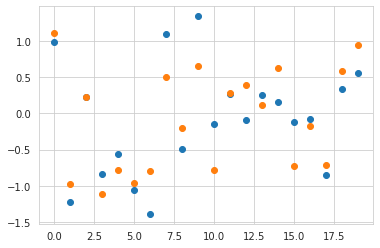

In [160]:
plt.scatter(x=y.index[:20],y=y[:20],cmap='blue')
plt.scatter(x=y.index[:20],y=y_pred[:20],cmap='red')

In [163]:
y_test=xbr.predict(test_encoding)

Predicting Value of Test data set 

In [164]:
y_test

array([-0.09641993, -0.27936262,  0.07025072, ..., -0.08816212,
        0.8901336 , -0.3528272 ], dtype=float32)

(array([  20.,  145.,  844., 2069., 2784., 1750.,  614.,  194.,   89.,
           9.]),
 array([-1.81732185, -1.40998137, -1.00264089, -0.5953004 , -0.18795992,
         0.21938056,  0.62672105,  1.03406153,  1.44140202,  1.8487425 ,
         2.25608298]),
 <a list of 10 Patch objects>)

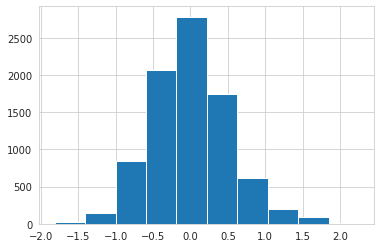

In [161]:
plt.hist((y_pred-y))

# **Saving the model** 

In [165]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [166]:
import pickle

filename = '/content/drive/MyDrive/datatrained/mart_sales/model.sav'
pickle.dump(xbr, open(filename, 'wb'))

# **Conclusion**

In [169]:

filename = '/content/drive/MyDrive/datatrained/mart_sales/model.sav'
model = pickle.load(open(filename, 'rb'))

In [170]:
y_pred = model.predict(x)
from sklearn.metrics import mean_squared_error as rms, r2_score
print(r2_score(y,y_pred))
print(rms(y,y_pred))


0.7262009218207826
0.27315621594297207


In [171]:
pd.concat([pd.DataFrame(y_pred),pd.DataFrame(y)],axis=1).T

0         1         2     ...      8520      8521      8522
0                  1.106272 -0.979874  0.227861  ...       NaN       NaN       NaN
Item_Outlet_Sales  0.984978 -1.217837  0.220282  ... -0.392973  0.070617 -0.797731

[2 rows x 8523 columns]